In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/cleaned_reviews.csv")

# Check basic info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393579 entries, 0 to 393578
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393579 non-null  int64 
 1   ProductId               393579 non-null  object
 2   UserId                  393579 non-null  object
 3   ProfileName             393563 non-null  object
 4   HelpfulnessNumerator    393579 non-null  int64 
 5   HelpfulnessDenominator  393579 non-null  int64 
 6   Score                   393579 non-null  int64 
 7   Time                    393579 non-null  int64 
 8   Summary                 393576 non-null  object
 9   Text                    393579 non-null  object
 10  Sentiment               393579 non-null  object
dtypes: int64(5), object(6)
memory usage: 33.0+ MB
None
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  393579.000000         393579.000000           393579.000000   
mean

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25876\4126888864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['positive', 'neutral', 'negative'], palette='Set2')


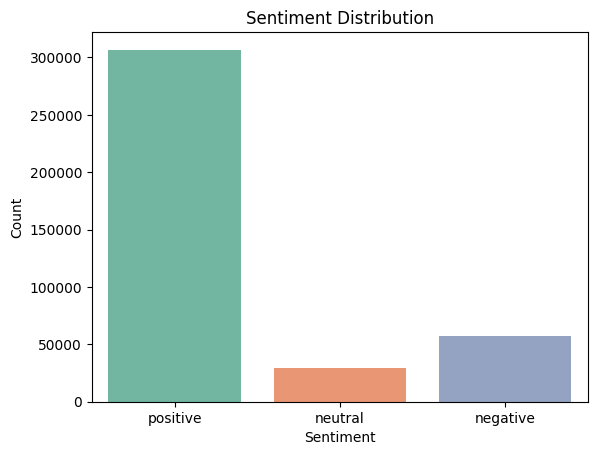

In [2]:
sns.countplot(data=df, x='Sentiment', order=['positive', 'neutral', 'negative'], palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


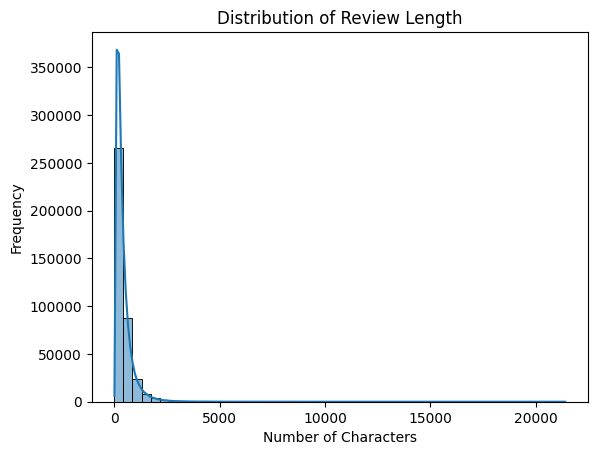

In [3]:
df['ReviewLength'] = df['Text'].apply(len)

sns.histplot(df['ReviewLength'], bins=50, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


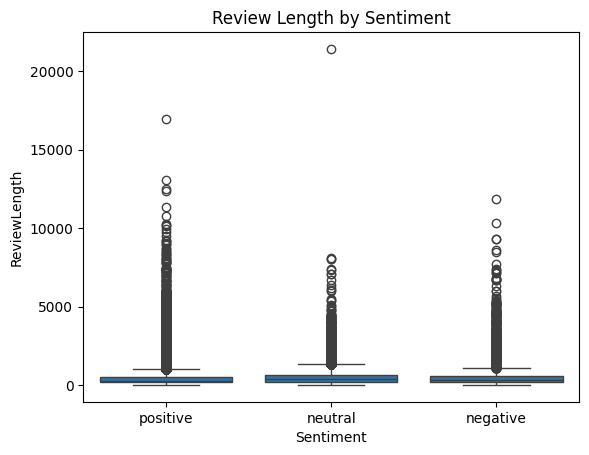

In [4]:
sns.boxplot(x='Sentiment', y='ReviewLength', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Review Length by Sentiment')
plt.show()


In [6]:
from wordcloud import WordCloud

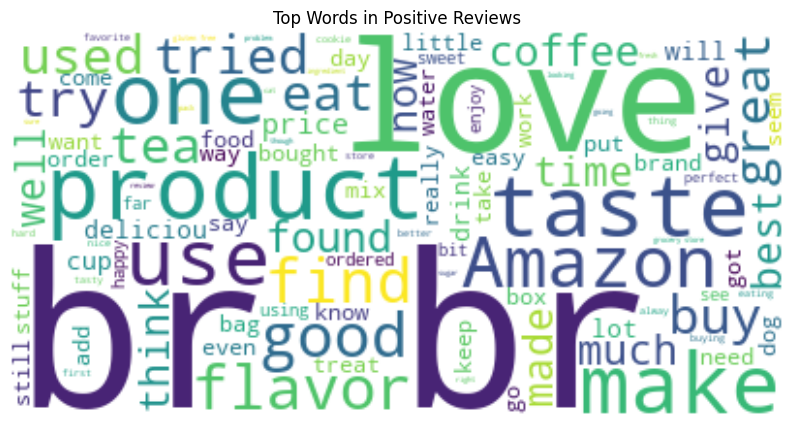

In [7]:
# Positive reviews
text_pos = " ".join(df[df['Sentiment'] == 'positive']['Text'])
wordcloud_pos = WordCloud(background_color='white', max_words=100).generate(text_pos)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Positive Reviews')
plt.show()

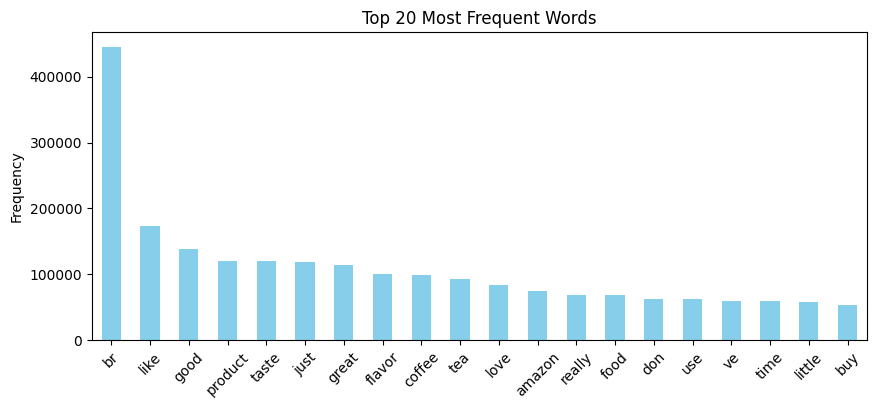

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Use only cleaned text
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['Text'])

# Convert to DataFrame
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_words = word_freq.sum().sort_values(ascending=False)

# Barplot
top_words.plot(kind='bar', figsize=(10, 4), color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
